In [1]:
import pandas as pd
df=pd.read_csv("level_coding_siswa_150.csv")
df

,hours_coding_daily,preferred_language,typing_speed,import_usage,oop_usage,level
0,4.0,Python,44,Yes,Yes,Advanced
1,5.0,C++,59,Yes,Yes,Advanced
2,5.0,Python,55,Yes,Yes,Advanced
3,5.0,Python,59,Yes,Yes,Advanced
4,5.0,Python,55,Yes,Yes,Advanced
...,...,...,...,...,...,...
169,2.5,C++,40,No,No,Intermediate
170,4.0,Python,48,Yes,Yes,Intermediate
171,5.0,C++,34,Yes,Yes,Intermediate
172,3.5,Java,45,Yes,No,Intermediate


In [2]:
df.columns

Index(['hours_coding_daily', 'preferred_language', 'typing_speed',
       'import_usage', 'oop_usage', 'level'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   hours_coding_daily  174 non-null    float64
 1   preferred_language  174 non-null    object 
 2   typing_speed        174 non-null    int64  
 3   import_usage        174 non-null    object 
 4   oop_usage           174 non-null    object 
 5   level               174 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 8.3+ KB


In [8]:
df.describe()

,hours_coding_daily,typing_speed
count,174.000000,174.000000
mean,3.215517,38.810345
std,1.299551,14.306864
min,1.000000,20.000000
25%,2.000000,25.250000
50%,3.000000,38.000000
75%,4.000000,50.000000
max,5.500000,65.000000


In [7]:
df.head()

,hours_coding_daily,preferred_language,typing_speed,import_usage,oop_usage,level
0,4.0,Python,44,Yes,Yes,Advanced
1,5.0,C++,59,Yes,Yes,Advanced
2,5.0,Python,55,Yes,Yes,Advanced
3,5.0,Python,59,Yes,Yes,Advanced
4,5.0,Python,55,Yes,Yes,Advanced


In [9]:
df.tail()

,hours_coding_daily,preferred_language,typing_speed,import_usage,oop_usage,level
169,2.5,C++,40,No,No,Intermediate
170,4.0,Python,48,Yes,Yes,Intermediate
171,5.0,C++,34,Yes,Yes,Intermediate
172,3.5,Java,45,Yes,No,Intermediate
173,3.0,C++,38,Yes,No,Intermediate


In [12]:
df.dtypes

hours_coding_daily    float64
preferred_language     object
typing_speed            int64
import_usage           object
oop_usage              object
level                  object
dtype: object

In [11]:
df['preferred_language'].value_counts()

preferred_language
Python    60
C++       59
Java      55
Name: count, dtype: int64

In [28]:
df['import_usage'].value_counts()

import_usage
Yes    92
No     82
Name: count, dtype: int64

In [13]:
df['level'].value_counts()

level
Advanced        64
Beginner        59
Intermediate    51
Name: count, dtype: int64

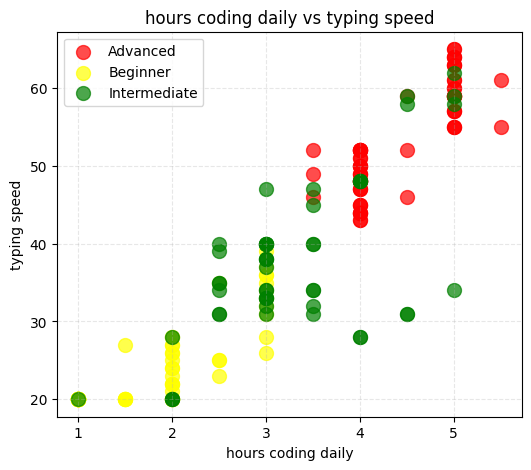

In [17]:
import matplotlib.pyplot as plt

advanced=df[df['level']=='Advanced']
beginner=df[df['level']=='Beginner']
intermediate=df[df['level']=='Intermediate']

plt.figure(figsize=(6,5))
plt.scatter(advanced['hours_coding_daily'],advanced['typing_speed'],s=100,color='red',alpha=0.7,label="Advanced")
plt.scatter(beginner['hours_coding_daily'],beginner['typing_speed'],s=100,color='yellow',alpha=0.7,label="Beginner")
plt.scatter(intermediate['hours_coding_daily'],intermediate['typing_speed'],s=100,color='green',alpha=0.7,label="Intermediate")
plt.title("hours coding daily vs typing speed")
plt.xlabel("hours coding daily")
plt.ylabel("typing speed")
plt.legend()
plt.grid(True,linestyle="--",alpha=0.3)

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

X=df[['hours_coding_daily', 'preferred_language', 'typing_speed','import_usage', 'oop_usage']]
y=df['level']

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

num=['hours_coding_daily','typing_speed']
cat=['preferred_language','import_usage', 'oop_usage']

preprocessing=ColumnTransformer(
    transformers=[
        ("std",StandardScaler(),num),
        ("ohe",OneHotEncoder(),cat),
        
    ]
)

model=Pipeline(
    steps=[
        ("preprocessing",preprocessing),
        ("model",RandomForestClassifier())
    ]
)



model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("accuracy score: ",accuracy_score(y_pred,y_test))
print("classification report: ",classification_report(y_pred,y_test))
print("confusion matrix: ",confusion_matrix(y_pred,y_test))
score_val=cross_val_score(model,X_train,y_train,cv=5,scoring="accuracy")
print("score cross val: ",score_val)
print("mean score cross val: ",score_val.mean())

accuracy score:  0.8857142857142857
classification report:                precision    recall  f1-score   support

    Advanced       0.94      0.94      0.94        17
    Beginner       0.88      0.88      0.88         8
Intermediate       0.80      0.80      0.80        10

    accuracy                           0.89        35
   macro avg       0.87      0.87      0.87        35
weighted avg       0.89      0.89      0.89        35

confusion matrix:  [[16  0  1]
 [ 0  7  1]
 [ 1  1  8]]
score cross val:  [0.82142857 0.89285714 0.82142857 0.85714286 0.88888889]
mean score cross val:  0.8563492063492063


In [64]:
param_grid={
    "model__n_estimators":[100,200,300],
    "model__max_depth":[None,10,20],
    "model__min_samples_split":[2,5,10],
    "model__max_features":['sqrt']
}

grid_search=GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    verbose=1,
    n_jobs=-1,
    scoring="accuracy"
)
grid_search.fit(X_train,y_train)
y_pred = grid_search.predict(X_test)
print("best params: ",grid_search.best_params_)
best_model=grid_search.best_estimator_
print("best model: ",best_model)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
best params:  {'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_split': 10, 'model__n_estimators': 100}
best model:  Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('std', StandardScaler(),
                                                  ['hours_coding_daily',
                                                   'typing_speed']),
                                                 ('ohe', OneHotEncoder(),
                                                  ['preferred_language',
                                                   'import_usage',
                                                   'oop_usage'])])),
                ('model', RandomForestClassifier(min_samples_split=10))])


In [74]:
data_baru=pd.DataFrame([[6,'Java','60','Yes','Yes']],columns=['hours_coding_daily', 'preferred_language', 'typing_speed',
       'import_usage', 'oop_usage'])
prediksi=model.predict(data_baru)[0]
presentase=max(model.predict_proba(data_baru)[0])
print(f"model memprediksi {prediksi} dengan presentase {presentase*100:.2f}%")

model memprediksi Advanced dengan presentase 98.17%


In [75]:
import joblib 
joblib.dump(model,"model_level.joblib")

['model_level.joblib']

In [ ]:
!python -m streamlit run app_streamlit.py